In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#df=pd.read_csv('earthquake.csv')
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
df=pd.read_csv("/content/gdrive/MyDrive/earthquake.csv")

df=df.drop(['Unnamed: 0','Origin (UTC)'],axis=1)
df['local time']=df['local time'].apply(lambda x:x[:-9])
df.head()

Mounted at /content/gdrive/


country     Lat     Long  Depth (km)  Magnitude Secondary Effects  death  \
0  Indonesia   5.722   94.687        85.6        7.0           nothing      0   
1      China  37.388  114.963         7.7        6.6           nothing      0   
2     China   32.753  104.088        10.7        6.7           nothing      0   
3      Japan  29.372  138.871       459.1        7.4           nothing      1   
4      China  24.400  102.500       233.0        5.5           nothing      1   

         local time  
0  1983-04-04 08:51  
1  1966-03-08 05:29  
2  1976-08-16 22:06  
3  1984-03-06 11:17  
4  1939-09-19 08:00

In [ ]:
#change type  of local time column and split it to date and time columns
from datetime import datetime

df[['date', 'time']] = df["local time"].apply(lambda x: pd.Series(str(x).split(' ')))
df['date']=df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
df['time']=df['time'].apply(lambda x: datetime.strptime(x, '%H:%M').time())
df.head()

country     Lat     Long  Depth (km)  Magnitude Secondary Effects  death  \
0  Indonesia   5.722   94.687        85.6        7.0           nothing      0   
1      China  37.388  114.963         7.7        6.6           nothing      0   
2     China   32.753  104.088        10.7        6.7           nothing      0   
3      Japan  29.372  138.871       459.1        7.4           nothing      1   
4      China  24.400  102.500       233.0        5.5           nothing      1   

         local time        date      time  
0  1983-04-04 08:51  1983-04-04  08:51:00  
1  1966-03-08 05:29  1966-03-08  05:29:00  
2  1976-08-16 22:06  1976-08-16  22:06:00  
3  1984-03-06 11:17  1984-03-06  11:17:00  
4  1939-09-19 08:00  1939-09-19  08:00:00

In [ ]:
import  plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go

# Set notebook mode to work in offline
pyo.init_notebook_mode()

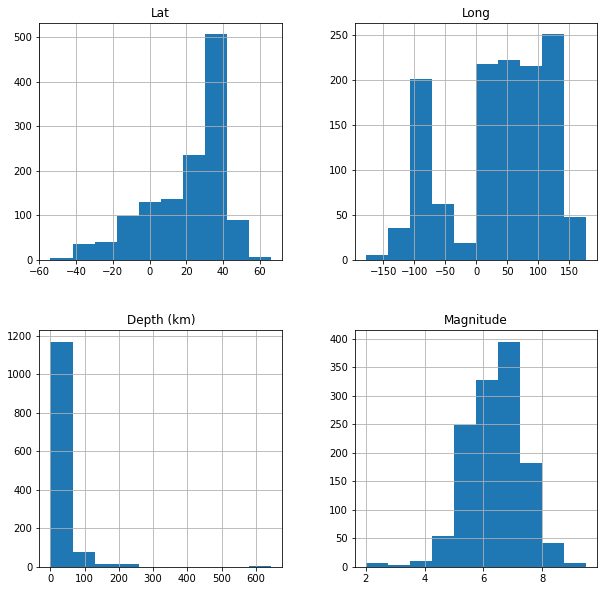

In [ ]:
p = df1.hist(figsize = (10,10))

In [ ]:
pip install geopandas

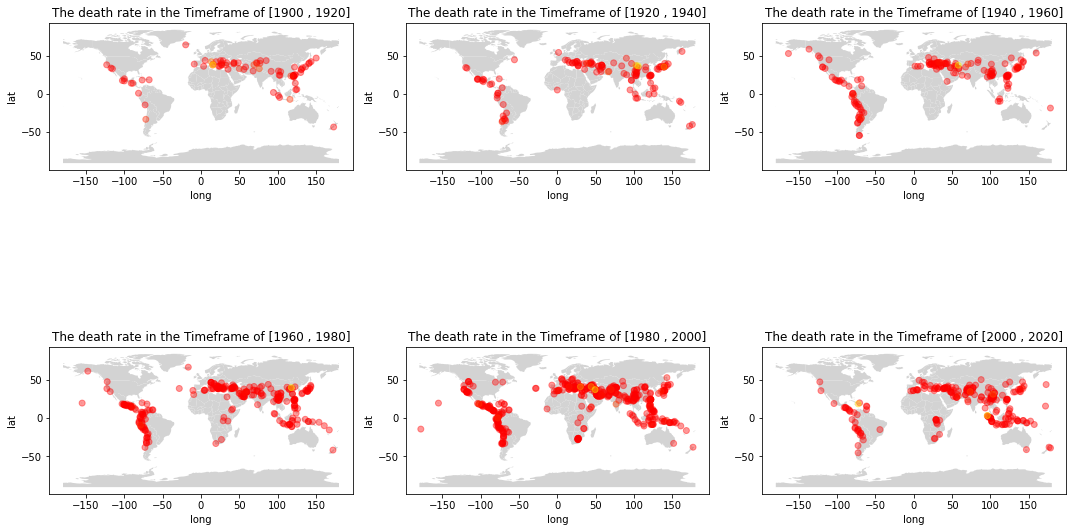

In [ ]:
import geopandas as gpd
import matplotlib.gridspec as gridspec
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
temp=df.copy()
temp['year']=temp['date'].apply(lambda x:x.year)
j=1900
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
ax = ax.flatten()
for i in [0,1,2,3,4,5]:
  worldmap.plot(color="lightgrey", ax=ax[i])
  d=temp[(temp['year']>=j+20*i)&(temp['year']<j+(20*(i+1)))]
  ax[i].scatter(d['Long'], d['Lat'], c=d['death'], alpha=0.4,cmap='autumn')
  ax[i].set_title('The death rate in the Timeframe of '+'['+str(j+20*i)+' , '+str(j+(20*(i+1)))+']')
  ax[i].set_xlabel('long')
  ax[i].set_ylabel('lat')
  #fig.suptitle('Death rates in the world due to earthquakes in different time periods')
  #fig.subplots_adjust(top=0.5)
  fig.tight_layout()
  fig.show()

بین سال های ۱۹۰۰ تا ۱۹۴۰ کمترین مقدار زلزله های مرگ بار ثبت شده دلیل ان می توانند کم بودن وسایل ارتباطی در بسیاری از نقاط جهان باشد برای مثال فقط یک زلزله مرگبار برای قاره ی افریقا در این بازه زمانی ثبت شده.
مقادیر زلزه های مرگبار در بازه زمانی ۱۹۸۰ تا ۲۰۰۰ بیشترین مقدار خود را دارد و بعد از ان کاهش چشمگیری دارد که می توانند دلیل ان ساختمان سازی اصولی تر ر برخی نقاط جهان باشد.

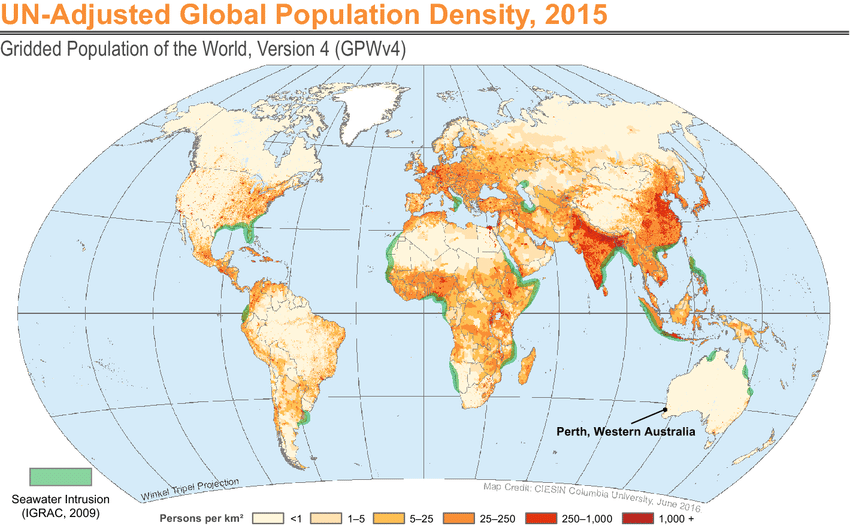

با توجه به عکس پراکندگی جمعیت جهان می توان گفت تراکم نقاط زلزله های مرگبار در نقاط پرجمعیت بیشتر بوده

ستون عواقب ثانویه را به شکل عددی کد می کنیم

In [ ]:
#encoding Secondary Effects column
#df5=df.copy()
df['Secondary Effects']=df['Secondary Effects'].str.split(',')

def fire(x):
  if ('fire' in x) |('f' in x) :
    return 1
  else:
    return 0
def liquefaction(x):
  if ('liquefaction' in x) |('lq' in x) :
    return 1
  else:
    return 0
def tsunami(x):
  if ('tsunami' in x) |('t' in x) :
    return 1
  else:
    return 0
def landslide(x):
  if ('landslide' in x) |('l' in x) :
    return 1
  else:
    return 0
df['fire']=df['Secondary Effects'].apply(lambda x:fire(x))
df['liquefaction']=df['Secondary Effects'].apply(lambda x:liquefaction(x))
df['tsunami']=df['Secondary Effects'].apply(lambda x:tsunami(x))
df['landslide']=df['Secondary Effects'].apply(lambda x:landslide(x))
df.tail()

country     Lat     Long  Depth (km)  Magnitude Secondary Effects  \
1271      China   37.386  102.311        25.0        7.9         [nothing]   
1272      China   36.601  105.317        25.0        8.6         [nothing]   
1273      Haiti   18.457  -72.533        13.0        7.0         [nothing]   
1274  Indonesia    3.287   95.972        30.0        9.1            [t, l]   
1275      China   39.605  117.888        16.7        7.6         [nothing]   

       death        local time        date      time  fire  liquefaction  \
1271  140000  1927-05-23 06:32  1927-05-23  06:32:00     0             0   
1272  207751  1920-12-16 20:05  1920-12-16  20:05:00     0             0   
1273  222517  2010-01-12 12:00  2010-01-12  12:00:00     0             0   
1274  264100  2004-12-26 07:58  2004-12-26  07:58:00     0             0   
1275  380013  1976-07-28 03:42  1976-07-28  03:42:00     0             0   

      tsunami  landslide  
1271        0          0  
1272        0          0  
1273        0          0  
1274        1          1  
1275        0          0

In [ ]:
#بازه تعداد مرگ را به ۲ قسمت تقسیم می کنیم
df1=df.copy()
df1['death']=pd.qcut(np.array(df1['death'].values),2,labels=["x<10", "x>9"])
df1['death'].value_counts()

x<10    638
x>9     638
Name: death, dtype: int64

کورولیشن بین ویژگی ها را بررسی می کنیم این کار به ما برای شناسایی ویژگی های مهم و یا ترکیب وئژگی در بخش کاهش ابعاد کمک کننده است
یکی از بهترین نمودارها برای نشان دادن کورولشن است زیرا از تضاد رنگ ها استفاده می کند hitmap

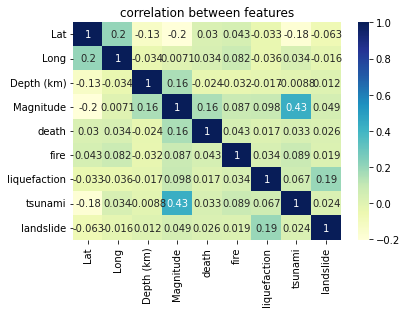

In [ ]:
ax = plt.axes()
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, ax = ax)
ax.set_title('correlation between features')
plt.show()

  بیشترین کورولیشن با تعداد مرگ را بزرگی زلزله داشته است

In [ ]:
df1['local time']=df1['local time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))
from sklearn.preprocessing import MinMaxScaler

# prepare data for normalization
values = df1['local time'].values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
#normalized the timestamps
df2=df1.copy()
normalized = scaler.transform(values)
df2['time']=normalized

#inversed = scaler.inverse_transform(normalized)
#print(inversed[i],'rev')

In [ ]:
#ordinal incod death column
scale_mapper = {"x<10":0, "x>9":1}
df2["death"] = df2["death"].replace(scale_mapper)

In [ ]:
#normaliztion the other columes
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
columns=['Lat', 'Long', 'Depth (km)', 'Magnitude']
x=sc_X.fit_transform(df2[columns])
df_n=pd.DataFrame(x,columns=columns)
df_n['time']=normalized
df_n=pd.concat([df_n,df2['death']],axis=1)
#shuffle database
#df_n=df_n.sample(frac=1,random_state=10).reset_index(drop=True)
df_n.head()

Lat      Long  Depth (km)  Magnitude      time  death
0 -0.725951  0.694374    1.248160   0.637256  0.678406      1
1  0.750191  0.947137   -0.497953   0.223340  0.538393      1
2  0.534126  0.811568   -0.430708   0.326819  0.624040      1
3  0.376517  1.245177    9.620085   1.051173  0.685974      1
4  0.144742  0.791772    4.552100  -0.914931  0.321353      1

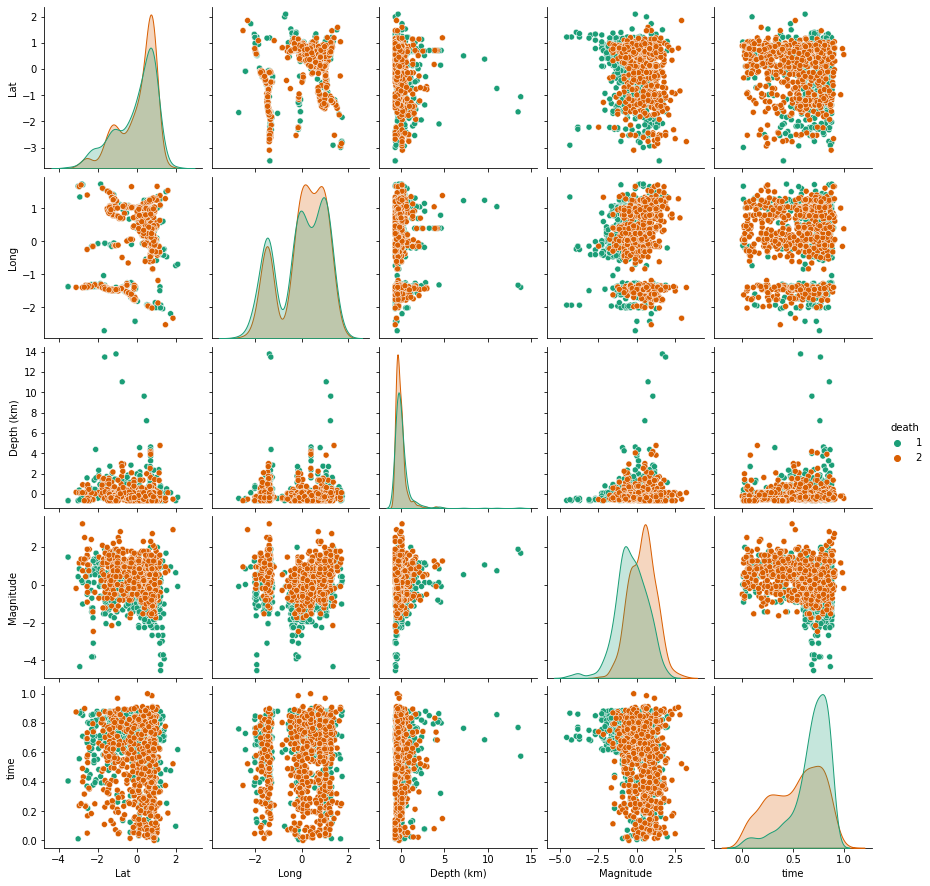

In [ ]:

p=sns.pairplot(df_n, hue = 'death',palette='Dark2')


عمق واریانس کمی دارد همچنین نتوانسته به خوبی کلاس ها را از هم جدا کند
تنها ستون های بزرگی زلزله و زمان توانسته اند تا حدی کلاس ها را جدا کنند
به طور کلی کلاس ها همپوشانی زیادی دارند همچنین به صورت خطی جداپذیر نیستند

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

87.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



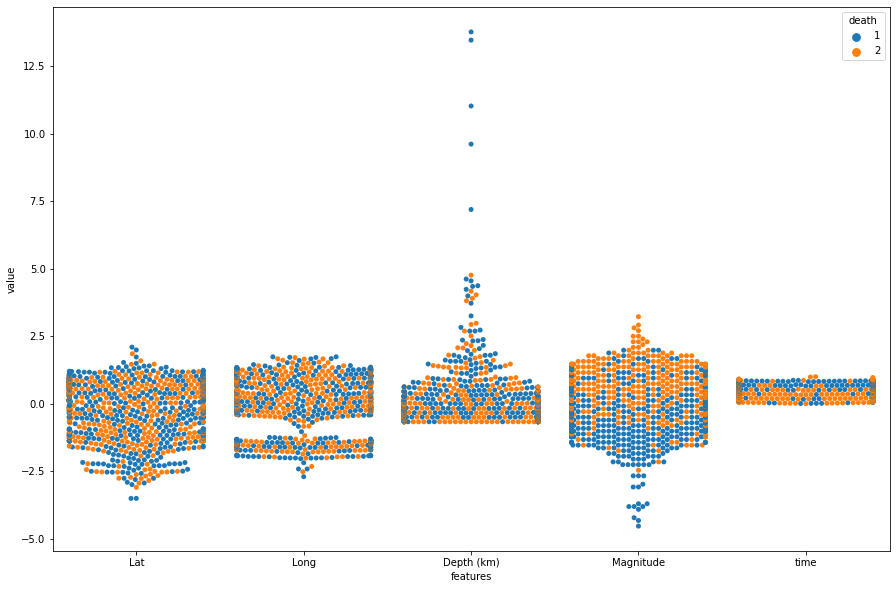

In [ ]:
data = pd.melt(df_n,id_vars="death",var_name="features",value_name='value')
plt.figure(figsize=(15,10))

sns.swarmplot(x="features", y="value", hue="death", data=data)

بزرگی و زمان زلزله تا حدی توانسته اند کلاس ها را جدا کنند همانطور که می شد حدس زد هرچه شدت زلزله بیشتر باشد زلزله مرگبارتر خواهد بود ولی برای زمان نمی توان گفت با افزایش لزوما تعداد مرگ بیشتر شده

در عمق و بزرگی زلزله بیشترتر از بقیه هست outlier تعداد


کاهش ابعاد زمانی بکار می رود که تعداد ویگی ها در مقایسه با تعداد نمونه ها زیاد باشد یا زمانی که از لحاظ حافظه و زمان مشکل اریم. در اینجا تعداد ویگی ها کم است و به نظر نیازی به کاهش ابعاد نیست

In [ ]:
sc_X = StandardScaler()
columns=['fire','liquefaction','tsunami','landslide']
x=sc_X.fit_transform(df2[columns])
df_n1=pd.DataFrame(x,columns=columns)
df_n=pd.concat([df_n1,df_n],axis=1)
#shuffle database
df_n=df_n.sample(frac=1,random_state=10).reset_index(drop=True)
df_n.head()

fire  liquefaction   tsunami  landslide       Lat      Long  \
0 -0.119618     -0.135484 -0.394711  -0.442579 -2.244654 -0.154170   
1 -0.119618     -0.135484 -0.394711  -0.442579  0.681153  0.393479   
2 -0.119618     -0.135484 -0.394711   2.259483  0.427235  0.501323   
3 -0.119618     -0.135484 -0.394711   2.259483  0.826734  1.270234   
4 -0.119618     -0.135484  2.533497  -0.442579 -0.144277 -1.442158   

   Depth (km)  Magnitude      time  death  
0   -0.558473  -1.432326  0.795651      2  
1    1.795081  -0.604493  0.842289      1  
2    0.125179  -1.328847  0.864535      1  
3   -0.513643   0.533777  0.885030      2  
4    0.764000   0.119861  0.053376      2

In [ ]:
#removing outliers
from scipy import stats
df_n=df_n[(np.abs(stats.zscore(df[['Depth (km)','Magnitude']])) < 3).all(axis=1)]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df_n.iloc[:,:9],df_n.iloc[:,9:10],test_size=0.20, stratify=df_n['death'])

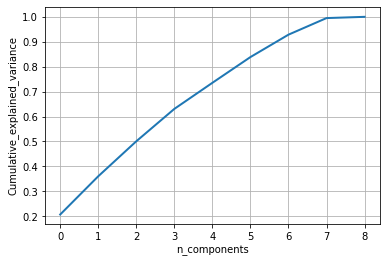

In [ ]:
#plot
from sklearn.decomposition import PCA
x=x_train
pca=PCA()
pca.n_components = 9
pca_data = pca.fit_transform(x)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

با انتخاب۷ ویژگی تقریبا تمام اطلاعات حفظ می شود

In [ ]:
# PCA
pca=PCA(n_components=7)
x_train=pca.fit_transform(x_train)
x_test = pca.transform(x_test)
#df4=pd.DataFrame(data=p31,columns=['1st_principal','2nd_principal','3rd_principal','4rd_principal'])


In [ ]:
#Hyperparameters of Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4],'min_impurity_decrease':[0.02,0.01,0]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
clf.fit(x_train,y_train)
#clf.predict(val.iloc[:,:5])
print("hpyerparameters" ,clf.best_estimator_)
print("accuracy :",clf.best_score_)

hpyerparameters DecisionTreeClassifier(max_leaf_nodes=9, min_impurity_decrease=0,
                       random_state=42)
accuracy : 0.6445527638190954


درخت تصمیم یک الگوریتم است که بر اساس میزان انتروپی کار می کند به این صورت که ویژگی ها به صورت نود انتخاب می شون و براساس ان ها نمونه ها به کلاس های مختلف تقسیم می شوند عمق هر ویژگی بر اساس خلوصی که در برگ هایش ایجاد می کند بستگی دارد.
این الگوریتم ساده و قابل فهم است ولی معمولا دچار بیش برازش می شود که با کمک تعیین هایپرپارامترها این مشکل تا حدی حل می شود.
در اینجا کمترین خلوصی که باید به ان برسیم تا الگوریتم متوقف شود، کمترین تعداد نمونه در هر نو برای اعمال کلاسبنی روی اون نود و بیشترین تعدا برگ به ععنوان هایپرپارامترها و توسط گریدسرچ  مقار دهی می شوند

train score= 0.7128514056224899 
test score= 0.676
0.68 accuracy
0.60 recall
0.71 precision
0.65 f1


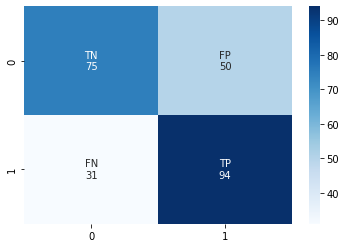

In [ ]:
#desition tree model

#from sklearn import tree
#train process
ct= DecisionTreeClassifier(max_leaf_nodes=9, min_impurity_decrease=0,random_state=42)
ct.fit(x_train,y_train)
#predict process
p_te=ct.predict(x_test)
print('train score=',ct.score(x_train,y_train),'\ntest score=',ct.score(x_test,y_test))
#confusion_matrix for desition trees model
from sklearn.metrics import confusion_matrix
mx= confusion_matrix(y_test,p_te)
name=['TN','FP','FN','TP']
mx1=mx.flatten()

labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
print("%0.2f accuracy" % accuracy_score(y_test,p_te))
print("%0.2f recall" % recall_score(y_test,p_te))
print("%0.2f precision" % precision_score(y_test,p_te))
print("%0.2f f1" % f1_score(y_test,p_te,))

دقت روی داده های اموزش و تست پایین است که نشانه کم بود اطلاعات و کافی نبودن ویژگی ها برای کلاسبندی است


In [ ]:
#Hyperparameters of LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params ={"C":[100,10,1,0.1,0.01], "penalty":["l2"]}
lr= GridSearchCV(LogisticRegression(random_state=42), params)
lr.fit(x_train,y_train['death'].values)
print("hpyerparameters" ,lr.best_params_)
print("accuracy :",lr.best_score_)

hpyerparameters {'C': 1, 'penalty': 'l2'}
accuracy : 0.6857587939698492


LogisticRegression:

یک خروجی احتمالی به ما می هد، سریع عمل می کنند و برای داده هایی که به شکل خطی جداپذیرند بسیار خوب عمل می کند.البته داده های ما در اینجا به شکل خطی جداپذیر نیستند.ااگر تعاد ویژگی ها زیادتر از نمونه ها باشد روش مناسبی نیست

c:

معکوس رگولاریزیشن است و هر چقر کوچکتر باشد الگریتم رگولاریزیشن بهتری دارد

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



train score= 0.6907630522088354 
test score= 0.672
0.67 accuracy
0.76 recall
0.65 precision
0.70 f1


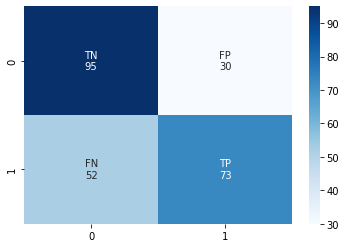

In [ ]:
#LogisticRegression model
logistic =LogisticRegression(C=1, penalty= 'l2',random_state=42)
logistic=logistic.fit(x_train,y_train)
#predict process
p_te= logistic.predict(x_test)
print('train score=',logistic.score(x_train,y_train),'\ntest score=',logistic.score(x_test,y_test))

#confusion_matrix for LogisticRegression model
mx= confusion_matrix(y_test,p_te)
name=['TN','FP','FN','TP']
mx1=mx.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
print("%0.2f accuracy" % accuracy_score(y_test,p_te))
print("%0.2f recall" % recall_score(y_test,p_te))
print("%0.2f precision" % precision_score(y_test,p_te))
print("%0.2f f1" % f1_score(y_test,p_te))

لجیستیک رگرشن عملکرد بهتری نسبت به درخت تصمیم داشت و مشکل بیش برازش ان را حل کرده و بطور کلی دقت بیشتری داشته است

In [ ]:
#Hyperparameters of K-Nearest-neighbors
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = range(1, 45)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
params = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# define grid search
lr= GridSearchCV(KNeighborsClassifier(), params)
lr.fit(x_train,y_train['death'].values)

print("hpyerparameters" ,lr.best_params_)
print("accuracy :",lr.best_score_)

hpyerparameters {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}
accuracy : 0.6837587939698493


الگوریتمی است که بر اساس فاصله کار می کند, پیاده سازی ان اسان است ولی اگر تعداد نمونه ها یا ویژگی ها زیاد باشد خوب کار نمی کند
هایپرپارامترهایی که اینجا برای این الگوریتم تعیین شده ان شامل: تعداد همسایه ها
مقیاس اندازه گیری فاصله و چگونگی تعیین وزن های همسایه ها است

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



train score= 1.0 
test score= 0.692
0.69 accuracy
0.70 recall
0.69 precision
0.69 f1


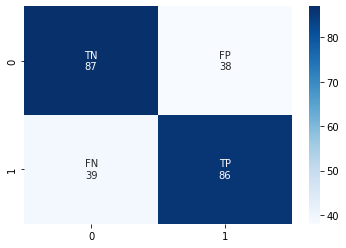

In [ ]:
#K-Nearest-neighbors model
knn = KNeighborsClassifier(metric='euclidean', n_neighbors= 31, weights='distance')
knn=knn.fit(x_train,y_train)
#predict process
p_te= knn.predict(x_test)
print('train score=',knn.score(x_train,y_train),'\ntest score=',knn.score(x_test,y_test))

#confusion_matrix for K-Nearest-neighbors model
mx= confusion_matrix(y_test,p_te)
name=['TN','FP','FN','TP']
mx1=mx.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
print("%0.2f accuracy" % accuracy_score(y_test,p_te))
print("%0.2f recall" % recall_score(y_test,p_te))
print("%0.2f precision" % precision_score(y_test,p_te))
print("%0.2f f1" % f1_score(y_test,p_te))

بیش برازش اتفاق افتاده و مدل به جای یادگیری فقط حفظ کرده است در نتیجه عملکر بدی روی داده های تست داشته است دلیل ان می تواند وجود نویز در داه ها باشد

In [ ]:
#Hyperparameters of SVC
from sklearn.svm import SVC

# define hyperparameters of SVC
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]

param = dict(kernel=kernel,C=C)
# define grid search
lr= GridSearchCV(SVC(random_state=42), param)
lr.fit(x_train,y_train['death'].values)
print("hpyerparameters" ,lr.best_params_)
print("accuracy :",lr.best_score_)

hpyerparameters {'C': 1.0, 'kernel': 'rbf'}
accuracy : 0.6746683417085426


یک الگوریتم است که کلاس بندی را بر اساس محدوده ی نمونه ها انجام می دهد عملکرد خوبی برای داده هایی که به صورت خطی جداپذیرند دارد اگر کلاس ها همپوشانی زیادی با یکدیگر داشته باشند خوب عمل نمی کند که البته با انتخاب یک هسته و بردن داده ها در یک فضایی با ابعاد بزرگ تر می تواند این مشکل را حل کند.
این الگوریتم از لحاظ محاسباتی پر هزینه است و بسیار ئابسته به نوع انتخاب هسته است

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



train score= 0.7389558232931727 
test score= 0.696
0.70 accuracy
0.72 recall
0.69 precision
0.70 f1


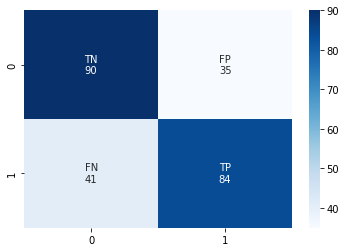

In [ ]:
#SVM model
svn= SVC(C=10, kernel='rbf',random_state=42)
svn=svn.fit(x_train,y_train)
#predict process
p_te= svn.predict(x_test)
print('train score=',svn.score(x_train,y_train),'\ntest score=',svn.score(x_test,y_test))

#confusion_matrix for svM model
mx= confusion_matrix(y_test,p_te)
name=['TN','FP','FN','TP']
mx1=mx.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
print("%0.2f accuracy" % accuracy_score(y_test,p_te))
print("%0.2f recall" % recall_score(y_test,p_te))
print("%0.2f precision" % precision_score(y_test,p_te))
print("%0.2f f1" % f1_score(y_test,p_te))

دقت این الگریتم روی داه های تست و اموزش تفاوت زیادی دارد که می تواند نشانه بیش برازش باش

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# define hyperparameters of GradientBoosting
n_estimators = [10, 100, 1000]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 5,7, 9]
# define grid search
param = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
# define grid search
lr= GridSearchCV(GradientBoostingClassifier(random_state=42), param)
lr.fit(x_train,y_train['death'].values)
print("hpyerparameters" ,lr.best_params_)
print("accuracy :",lr.best_score_)




hpyerparameters {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
accuracy : 0.6827236180904522


این الگریتم داده های اموزش را به چند دسته تقسیم می کند و ان ها را به شکل سری  اموزش می دهد و با توجه به خطای دسته ی قبلی وزن های دسته جدید را اپدیت می کند
هایپرپارامترهای های ان شامل: تعداد دسته های انتخاب شده، بیشترین عمقی که درخت می تواند داشته باشد، درصدی از مشاهدات که هر درخت می تواند داشته باشد و تاثیری که جواب هر دسته روی جواب کلی دارد می باشند

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



train score= 0.8182730923694779 
test score= 0.676
0.68 accuracy
0.68 recall
0.67 precision
0.68 f1


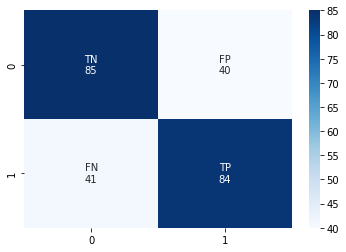

In [ ]:
#GradientBoosting model
gb= GradientBoostingClassifier(learning_rate= 0.01, max_depth= 5, n_estimators= 100, subsample= 0.5,random_state=42)
gb=gb.fit(x_train,y_train)
#predict process
p_te= gb.predict(x_test)
print('train score=',gb.score(x_train,y_train),'\ntest score=',gb.score(x_test,y_test))

#confusion_matrix for svn model
mx= confusion_matrix(y_test,p_te)
name=['TN','FP','FN','TP']
mx1=mx.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
print("%0.2f accuracy" % accuracy_score(y_test,p_te))
print("%0.2f recall" % recall_score(y_test,p_te))
print("%0.2f precision" % precision_score(y_test,p_te))
print("%0.2f f1" % f1_score(y_test,p_te))

دقت بدست امده برای داده های تست و اموزش تفاوت زیادی دارد که نشانه ی بیش برازش است

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define hyperparameters of GradientBoosting
n_estimators = [1000, 2000, 3000]
max_features = ['sqrt', 'log2']
# define grid search
param = dict(n_estimators=n_estimators,max_features=max_features)
# define grid search
lr= GridSearchCV(RandomForestClassifier(random_state=42), param,cv=cv)
lr.fit(x_train,y_train['death'].values)
print("hpyerparameters" ,lr.best_params_)
print("accuracy :",lr.best_score_)

hpyerparameters {'max_features': 'sqrt', 'n_estimators': 2000}
accuracy : 0.6774242424242424


یک راه حل برای مشکل بیش برازش رخت تصمیم است. شامل تعدا زیادی درخت تصمیم می باشد که هر کدام ویژگی ها ی خود را دارند و برای نتیجه ی نهایی بین نتایج درخت ها رای گیری می شود
هایپرپارامترهایی که در اینجا تعیین شده ان شامل: تعداد درختان جنگل و روش بدست اوردن بیشترین تعداد ویژگی می شوند

<ipython-input-285-6782f2bfd0d0>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



train score= 1.0 
test score= 0.732
0.73 accuracy
0.73 recall
0.73 precision
0.73 f1


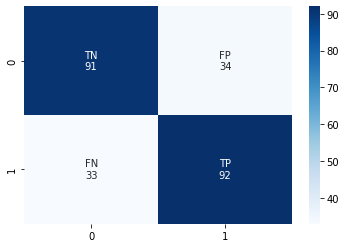

In [ ]:
#random forest moldel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features= 'sqrt', n_estimators= 2000,random_state=42)
rf.fit(x_train,y_train)
p_te=rf.predict(x_test)
print('train score=',rf.score(x_train,y_train),'\ntest score=',rf.score(x_test,y_test))
#confusion_matrix for svn model
mx= confusion_matrix(y_test,p_te)
name=['TN','FP','FN','TP']
mx1=mx.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
print("%0.2f accuracy" % accuracy_score(y_test,p_te))
print("%0.2f recall" % recall_score(y_test,p_te))
print("%0.2f precision" % precision_score(y_test,p_te))
print("%0.2f f1" % f1_score(y_test,p_te))

برای مدل بیش برازش اتفاق افتاده

**Comparison models**

* accuracy:

   LogisticRegression < boostig < DesitionTree  < KNN < SVM < RandomForest

* recall:

   DesitionTree < boostig < KNN < SVM < RandomForest < LogisticRegression

* precision:

   LogisticRegression < boostig < SVM < KNN < DesitionTree < RandomForest

* f1:

   DesitionTree < boostig < KNN < LogisticRegression = SVM < RandomForest



جنگل تصادفی بهتر از دیگر مدل ها عمل کرده

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
